# Chapter 1: Singular Value Decomposition (SVD)

## SVD

In [ ]:
import numpy as np

In [ ]:
X = np.random.randn(5, 3)
U, S, VT = np.linalg.svd(X, full_matrices=True)  # Full SVD
Uhat, Shat, VThat = np.linalg.svd(X, full_matrices=False)  # Economy SVD

In [ ]:
print(X.shape)
print(U.shape, S.shape, VT.shape)
print(Uhat.shape, Shat.shape, VThat.shape)

(5, 3)
(5, 5) (3,) (3, 3)
(5, 3) (3,) (3, 3)


In [ ]:
np.allclose(X, Uhat @ np.diag(Shat) @ VThat)

True

In [ ]:
Shat

array([3.80275074, 2.01206295, 1.52389365])

## Image Compression

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.image import imread

# plt.rcParams['figure.figsize'] = [16, 8]
# plt.rcParams.update({'font.size': 18})

In [ ]:
A = imread(os.path.join('.', 'DATA', 'dog.jpg'))
A.shape

(2000, 1500, 3)

In [ ]:
X = np.mean(A, -1)  # RGB -> grayscale
X.shape

(2000, 1500)

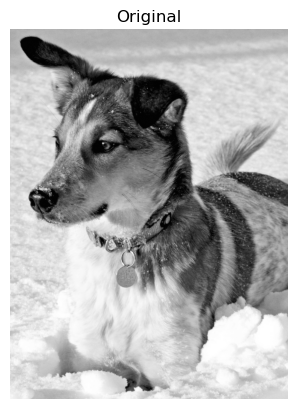

In [ ]:
plt.imshow(X, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.show()

In [ ]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
print(" X", X.shape)
print(" U", U.shape)
print(" S", S.shape)
print("VT", VT.shape)

 X (2000, 1500)
 U (2000, 1500)
 S (1500, 1500)
VT (1500, 1500)


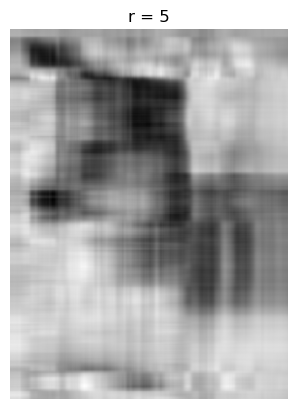

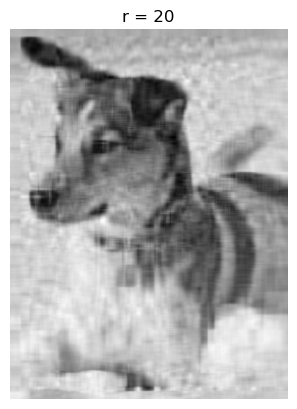

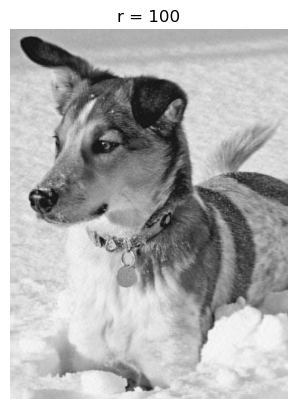

In [ ]:
for r in (5, 20, 100):
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    
    # print(np.linalg.norm(X-Xapprox)**2)
    # print((S[r:, r:]**2).sum())
    
    plt.imshow(Xapprox, cmap='gray')
    plt.title(f"r = {r}")
    plt.axis('off')
    plt.show()

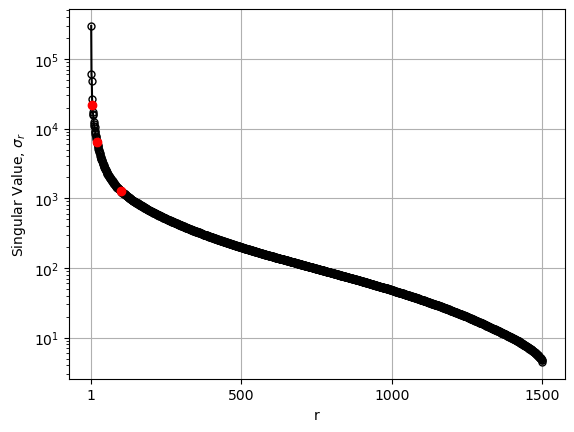

In [ ]:
sigma = np.diag(S)
r = np.arange(1,len(sigma)+1)
plt.semilogy(r, sigma, 'ko-', ms=5, mfc='none')
plt.xlabel('r')
plt.ylabel('Singular Value, $\sigma_r$')
plt.scatter(5, sigma[r==5], color='r', zorder=99)
plt.scatter(20, sigma[r==20], color='r', zorder=99)
plt.scatter(100, sigma[r==100], color='r', zorder=99)
plt.xticks([1, 500, 1000, 1500])
plt.grid()
plt.show()

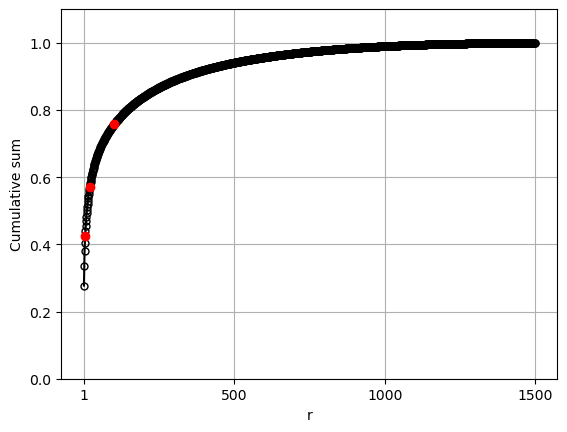

In [ ]:
sigma = np.diag(S)
r = np.arange(1,len(sigma)+1)
cumsum = np.cumsum(sigma)/np.sum(sigma)
plt.plot(cumsum, 'ko-', ms=5, mfc='none')
plt.xlabel('r')
plt.ylabel('Cumulative sum')
plt.scatter(5, cumsum[r==5], color='r', zorder=99)
plt.scatter(20, cumsum[r==20], color='r', zorder=99)
plt.scatter(100, cumsum[r==100], color='r', zorder=99)
plt.ylim(0, 1.1)
plt.xticks([1, 500, 1000, 1500])
plt.grid()
plt.show()

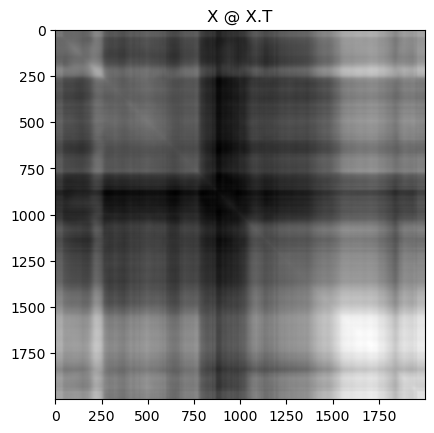

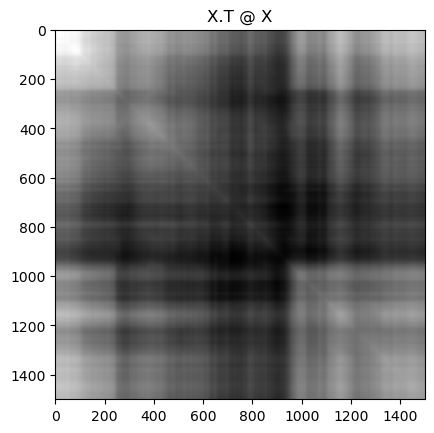

In [ ]:
plt.imshow(X @ X.T, cmap='gray')
plt.title("X @ X.T")
plt.show()

plt.imshow(X.T @ X, cmap='gray')
plt.title("X.T @ X")
plt.show()

In [ ]:
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

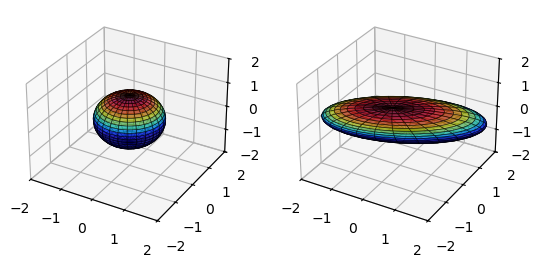

In [ ]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()